In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

In [13]:
ticker_symbol = "AAPL"
stock_data = yf.download(ticker_symbol, start="2020-01-01", end="2024-01-01")
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960480,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


<Axes: xlabel='Date'>

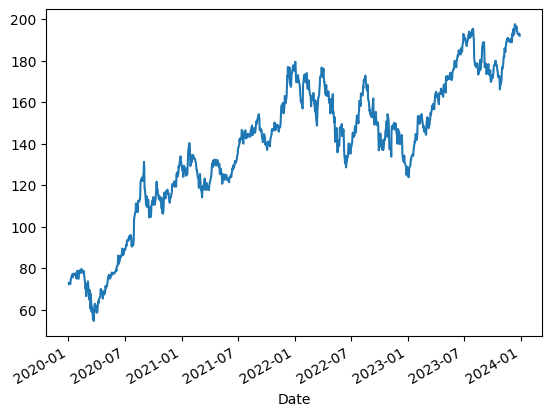

In [14]:
stock_data['Adj Close'].plot()

In [15]:
stock_data['Simple Return'] = stock_data['Adj Close'].pct_change()
stock_data['Log Return'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))

<Axes: xlabel='Date'>

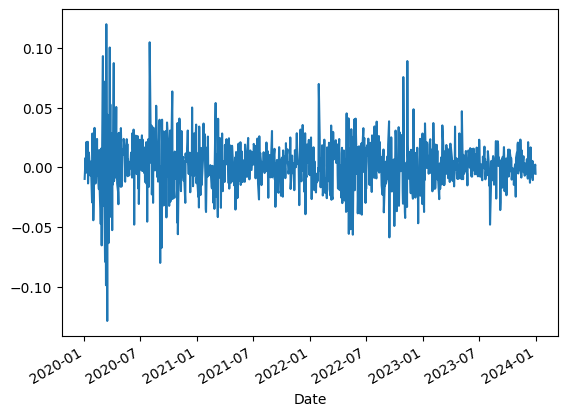

In [16]:
stock_data['Simple Return'].plot()

<Axes: xlabel='Date'>

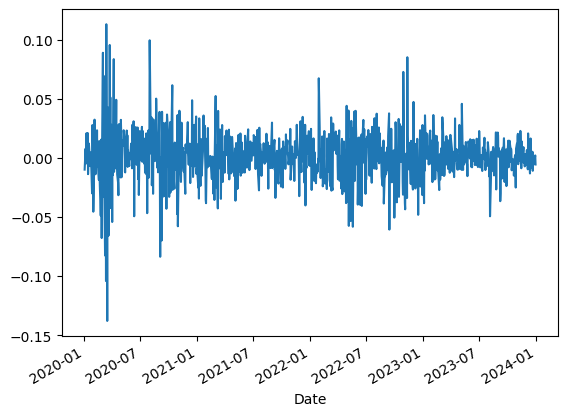

In [17]:
stock_data['Log Return'].plot()

<Axes: xlabel='Date'>

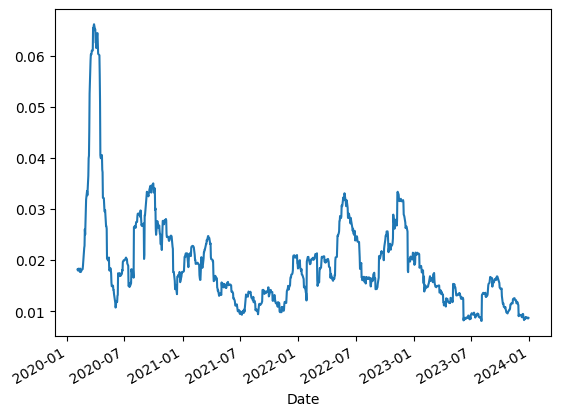

In [18]:
stock_data['Realised Vol'] = stock_data['Log Return'].rolling(22).std()
stock_data['Realised Vol'].plot()

In [19]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Simple Return,Log Return,Realised Vol
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960480,135480400,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800,-0.009722,-0.009770,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200,0.007968,0.007937,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000,-0.004703,-0.004714,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200,0.016086,0.015958,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,-0.005547,-0.005563,0.008792
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,-0.002841,-0.002845,0.008799
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,0.000518,0.000518,0.008641


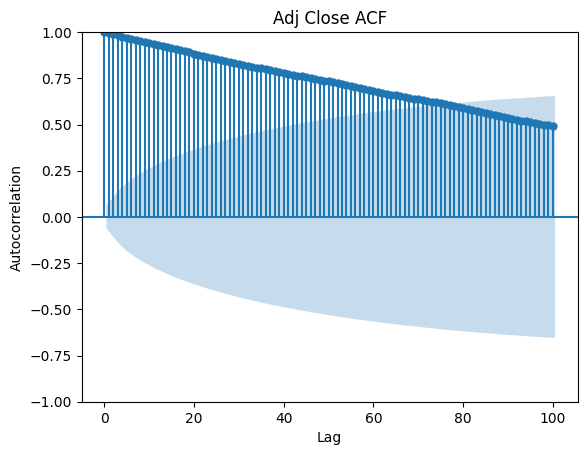

In [51]:
plot_acf(stock_data['Adj Close'], lags=100)
plt.title("Adj Close ACF")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

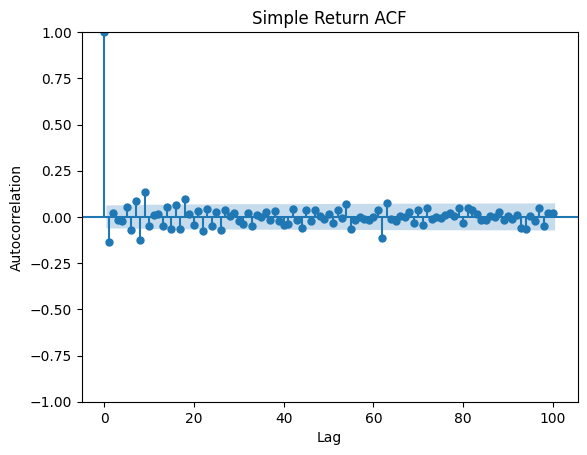

In [50]:
plot_acf(stock_data['Simple Return'].dropna(), lags=100)
plt.title("Simple Return ACF")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

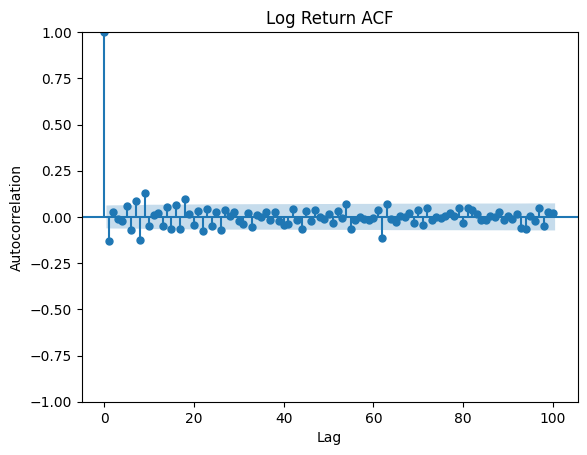

In [49]:
plot_acf(stock_data['Log Return'].dropna(), lags=100)
plt.title("Log Return ACF")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

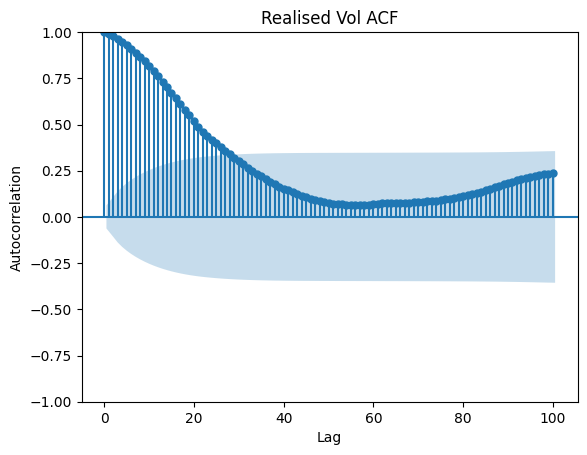

In [48]:
plot_acf(stock_data['Realised Vol'].dropna(), lags=100)
plt.title("Realised Vol ACF")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()